In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("out.csv", index_col=False)
df

,heuristic,machines,tasks,makespan,time_nano,iterations,param
0,LocalSearchBest,10,32,622,5450,14,NaN
1,LocalSearchBest,10,32,588,3968,17,NaN
2,LocalSearchBest,10,32,606,7474,16,NaN
3,LocalSearchBest,10,32,577,3016,13,NaN
4,LocalSearchBest,10,32,714,2855,13,NaN
...,...,...,...,...,...,...,...
3595,SimulatedAnnealing,50,2500,2503,1080116,2140,0.99
3596,SimulatedAnnealing,50,2500,2555,1084594,2165,0.99
3597,SimulatedAnnealing,50,2500,2499,1083943,2153,0.99
3598,SimulatedAnnealing,50,2500,2502,1081508,2155,0.99


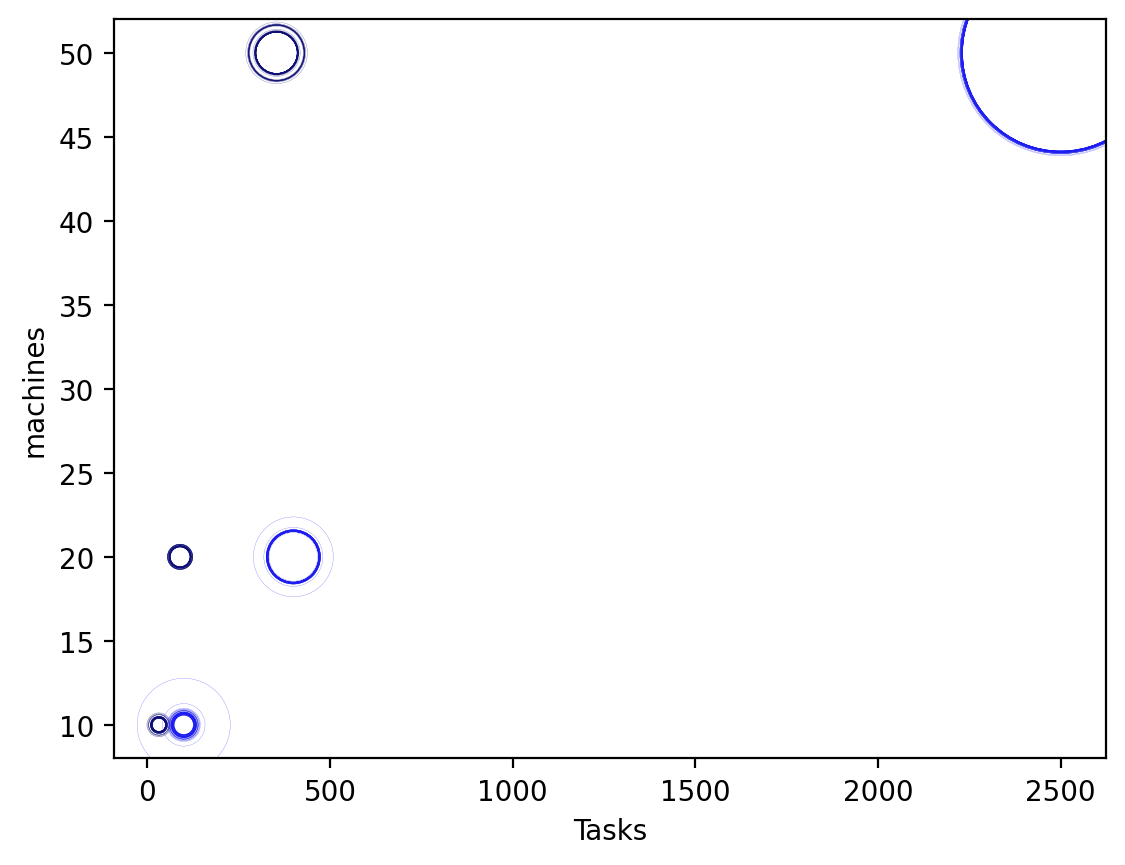

In [86]:
from matplotlib import cm

annealing = df[(df["heuristic"] == "SimulatedAnnealing")].sort_values("machines").sort_values("tasks")
lsb = df[(df["heuristic"] == "LocalSearchBest")].sort_values("machines").sort_values("tasks")

fig, ax = plt.subplots(dpi=200)
ax.set_ylabel("machines")
ax.set_xlabel("Tasks")

def red(col):
    return f'#{col:02x}{col//8:02x}{col//8:02x}'
def blue(col):
    return f'#{col//8:02x}{col//8:02x}{col:02x}'
def green(col):
    return f'#{col//8:02x}{col:02x}{col//8:02x}'


M = [10, 20, 50]
R = [1.5, 2.0]

for m in M:
    for (ri, r) in enumerate(R):
        n = np.ceil(m ** r)
        data = lsb[(lsb["machines"] == m) & (lsb["tasks"] == n)].sort_values("tasks")
        x_axis = data["tasks"]
        y_axis = data["machines"]
        z_axis = data["time_nano"] / 100
        plt.scatter(x_axis, y_axis, s=z_axis, color=blue((ri+1) * 120), facecolor='none', alpha=0.7, linewidth=0.1)

plt.show()

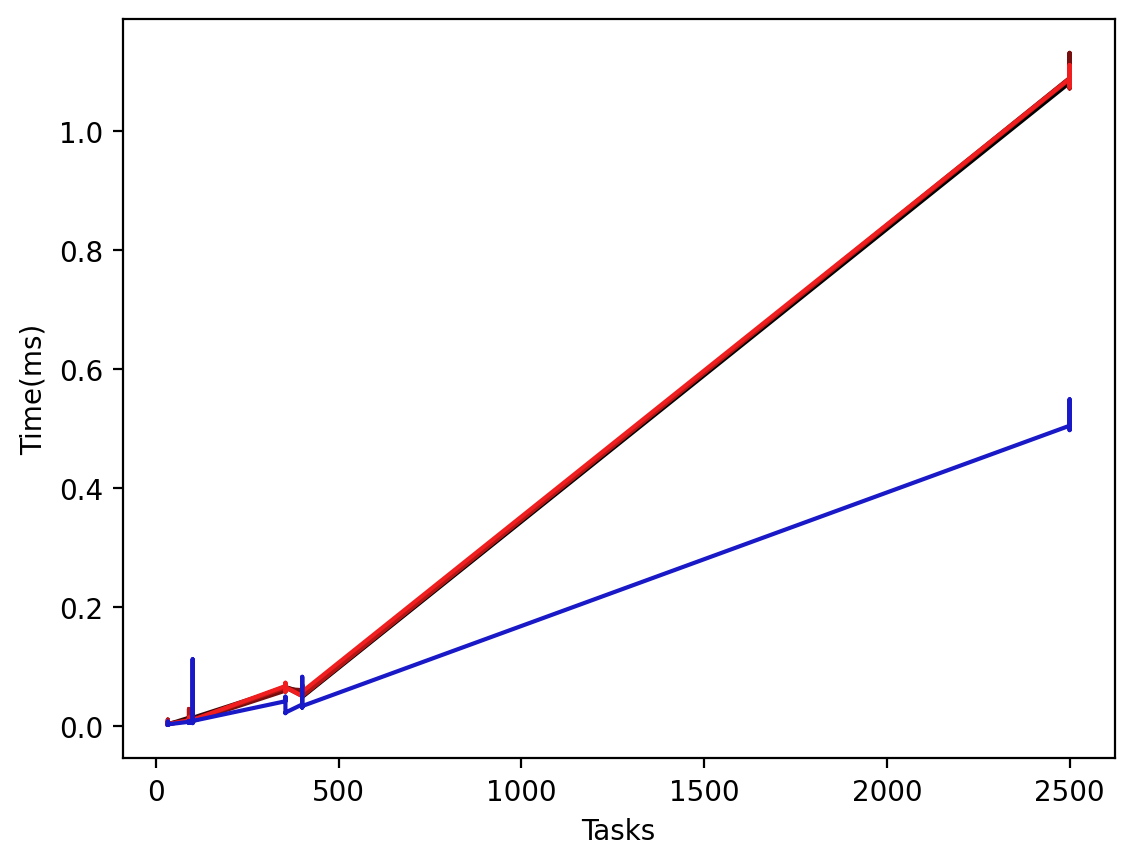

In [84]:
annealing = df[(df["heuristic"] == "SimulatedAnnealing")].sort_values("machines").sort_values("tasks")
lsb = df[(df["heuristic"] == "LocalSearchBest")].sort_values("machines").sort_values("tasks")


fig, ax = plt.subplots(dpi=200)
ax.set_ylabel("Time(ms)")
ax.set_xlabel("Tasks")

def red(col):
    return f'#{col:02x}{col//8:02x}{col//8:02x}'

def blue(col):
    return f'#{col//8:02x}{col//8:02x}{col:02x}'

for i, alpha in enumerate((0.8, 0.85, 0.9, 0.95, 0.99)):
    frame = annealing[annealing["param"] == alpha]
    x_axis = frame["tasks"]
    y_axis = frame["time_nano"] / 1_000_000
    ax.plot(x_axis, y_axis, color=red(60*i))

x_axis = lsb["tasks"]
y_axis = lsb["time_nano"] / 1_000_000
ax.plot(x_axis, y_axis, color=blue(200))

plt.show()

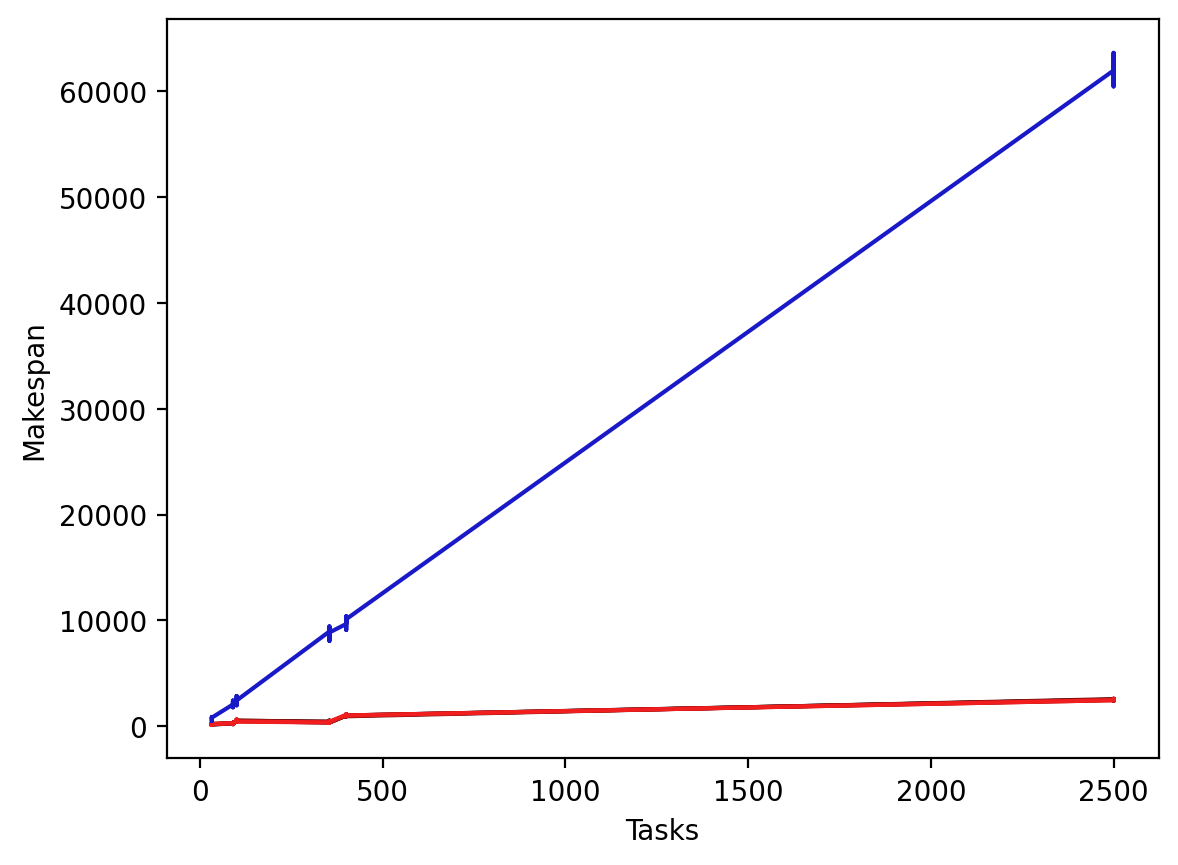

In [85]:
annealing = df[(df["heuristic"] == "SimulatedAnnealing")].sort_values("tasks")
lsb = df[(df["heuristic"] == "LocalSearchBest")].sort_values("tasks")


fig, ax = plt.subplots(dpi=200)
ax.set_ylabel("Makespan")
ax.set_xlabel("Tasks")

def red(col):
    return f'#{col:02x}{col//8:02x}{col//8:02x}'

def blue(col):
    return f'#{col//8:02x}{col//8:02x}{col:02x}'

for i, alpha in enumerate((0.8, 0.85, 0.9, 0.95, 0.99)):
    frame = annealing[annealing["param"] == alpha]
    x_axis = frame["tasks"]
    y_axis = frame["makespan"]
    ax.plot(x_axis, y_axis, color=red(60*i))

x_axis = lsb["tasks"]
y_axis = lsb["makespan"]
ax.plot(x_axis, y_axis, color=blue(200))

plt.show()